In [1]:

from tqdm.notebook import tqdm
import numpy as np
import seaborn as sns
sns.set_theme(style="darkgrid")
from matplotlib import pyplot as plt

from causalbenchmark.graphs import create_graph, BayesNet, hparam, node
# from causalbenchmark.graphs.builders import RelativeSpawner, RelativeBuilder, RelativeSCMEnsemble
from causalbenchmark.graphs.builders import MechanismCorrelationBuilder

from causalbenchmark.test._test_util import example_labels
np.set_printoptions(precision=3, suppress=True)

In [2]:
story_id = 'example-confounding'

scm = create_graph(story_id)
print(scm)

p(Z) p(X | Z) p(Y | X, Z)


In [3]:
def plot_distribution(data, **kwargs):
	# sns.histplot(data)
	sns.kdeplot(data)

	plt.xlabel('Value')
	plt.ylabel('Density')
	plt.xlim(-1, 1)

	# Show the plot
	# plt.show()
	print(f'Mean: {ates.mean():.2f} [{ates.min():.2f}, {ates.max():.2f}]')


In [4]:
metric = lambda ensemble: [val['Y'] for val in tqdm(ensemble.ate_samples('X'), total=N)]
# metric = lambda ensemble: [val['Y'] for val in tqdm(ensemble.ett('X'), total=N)]

In [5]:
story_id = 'example-confounding'

builder = MechanismCorrelationBuilder(seed=100)

specs = np.array(list(builder.spawn_specs(story_id)))

In [9]:
spec = np.random.choice(specs)
spec = {'Z': 0, 'X': {'Z': -1}, 'Y': {'X': -1, 'Z': 0}}
# spec = {'Z': 0, 'X': {'Z': -1}, 'Y': {'X': 0, 'Z': -1}}
# spec = {'Z': 0, 'X': {'Z': 0}, 'Y': {'X': 1, 'Z': 0}}
# spec = {'Z': 1, 'X': {'Z': 0}, 'Y': {'X': 1, 'Z': 0}}
spec

{'Z': 0, 'X': {'Z': -1}, 'Y': {'X': -1, 'Z': 0}}

In [10]:
N = 100

ensemble = builder.generate_scm(graph_id=story_id, spec=spec, size=N)
print(ensemble)

  0%|          | 0/100 [00:00<?, ?it/s]

Mean: -0.47 [-0.83, -0.26]


(-0.832712335023192, -0.2559990678860825)

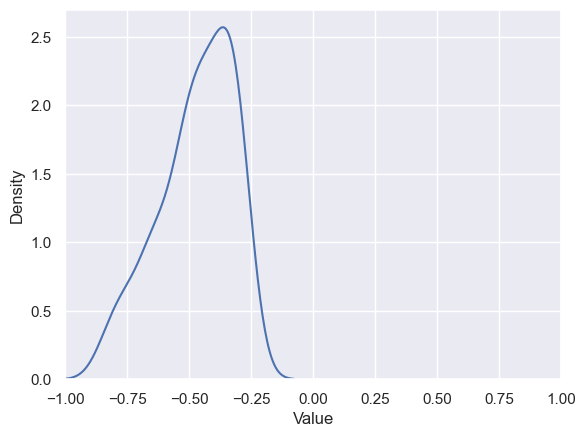

In [11]:
ates = np.array(metric(ensemble))
bounds = ensemble.ate_bounds('Y', 'X')
plot_distribution(ates)
bounds

In [18]:
solver =  builder.generate_constrained_scm(graph_id=story_id, spec=spec)

solver

In [19]:
solver.ate_bounds('Y', 'X')

C:\Users\anwan\miniconda3\lib\site-packages\scipy\optimize\_constraints.py:458: OptimizeWarning: Constraint option `keep_feasible` is ignored by this method.
  warn("Constraint option `keep_feasible` is ignored by this "


(-0.9979999999999996, -0.2509999999999998)

In [19]:
# Import packages.
import cvxpy as cp
import numpy as np
from scipy import optimize as opt
from scipy.optimize import LinearConstraint

In [100]:
eps = 0.001

n = 7

# x = cp.Variable(n)
Q = np.zeros((n, n))
Q[0, 3] = 1
Q[0, 4] = -1
Q[0, 5] = -1
Q[0, 6] = 1

Q = (Q + Q.T) / 2

q = np.zeros(n)
q[5] = 1
q[6] = -1

mx = np.ones(n)
mn = np.zeros(n)

m = 4

A = np.zeros((m, n))

A[0, 0] = -1
A[1, 2] = 1
A[1, 1] = -1
A[2, 4] = 1
A[2, 3] = -1
A[3, 6] = 1
A[3, 5] = -1
a
b = np.zeros(m)
b[0] = -0.2
b[1:] = eps

def objective(x):
	return x.T @ Q @ x + q.T @ x
def neg_objective(x):
	return -objective(x)


constraints = [LinearConstraint(np.eye(n), mn+eps, mx-eps),
			   LinearConstraint(A, b, np.inf * np.ones(m))]

x0 = np.ones(n)*0.5
# x0 = np.random.uniform(0, 1, n)
# x0 = np.array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7])

method = None #'slsqp'

In [101]:

sol = opt.minimize(objective, x0, constraints=constraints, method=method)
print(sol.success, sol.fun)
print(sol.x)

nsol = opt.minimize(neg_objective, x0, constraints=constraints, method=method)
print(nsol.success, -nsol.fun)
print(nsol.x)

True -0.998
[0.2   0.499 0.5   0.001 0.999 0.001 0.999]
True -0.0010000000000000633
[0.2   0.5   0.5   0.5   0.5   0.499 0.501]


In [7]:
spec

NameError: name 'spec' is not defined

In [8]:
def g(n=10):
	yield from range(n)

In [9]:
5 in g()

True

In [11]:
N = 100

world = []

for spec in tqdm(specs):
	builder = RelativeBuilder(seed=100)

	ensemble = RelativeSCMEnsemble(story_id=story_id, spec=spec, builder=builder, num_samples=N)

	data = [val['Y'] for val in ensemble.ate('X')]
	world.append(data)

world = np.array(world)
world.shape

  0%|          | 0/48 [00:00<?, ?it/s]

(48, 100)

In [12]:
good = np.sign(world.min(1)) * np.sign(world.max(1)) > 0
good.mean()

0.75

In [13]:
specs[~good.astype(bool)]

array([{'Z': 0, 'X': {'Z': -1}, 'Y': {'X': 0, 'Z': -1}},
       {'Z': 0, 'X': {'Z': -1}, 'Y': {'X': 0, 'Z': 1}},
       {'Z': 0, 'X': {'Z': 1}, 'Y': {'X': 0, 'Z': -1}},
       {'Z': 0, 'X': {'Z': 1}, 'Y': {'X': 0, 'Z': 1}},
       {'Z': 1, 'X': {'Z': -1}, 'Y': {'X': 0, 'Z': -1}},
       {'Z': 1, 'X': {'Z': -1}, 'Y': {'X': 0, 'Z': 1}},
       {'Z': 1, 'X': {'Z': 1}, 'Y': {'X': 0, 'Z': -1}},
       {'Z': 1, 'X': {'Z': 1}, 'Y': {'X': 0, 'Z': 1}},
       {'Z': 2, 'X': {'Z': -1}, 'Y': {'X': 0, 'Z': -1}},
       {'Z': 2, 'X': {'Z': -1}, 'Y': {'X': 0, 'Z': 1}},
       {'Z': 2, 'X': {'Z': 1}, 'Y': {'X': 0, 'Z': -1}},
       {'Z': 2, 'X': {'Z': 1}, 'Y': {'X': 0, 'Z': 1}}], dtype=object)

{'Z': 2, 'X': {'Z': 1}, 'Y': {'X': 1, 'Z': 1}}
Mean: -0.47 [-0.84, -0.26]


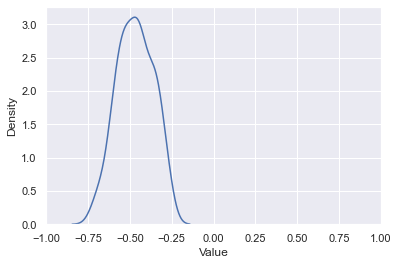

In [14]:
idx = np.random.choice(len(world))
print(spec)

plot_distribution(world[idx])

In [15]:
ensemble.details(example_labels)

'The chance of Z=1 is high compared to Z=0. The chance of X=1 increases when Z=1 compared to Z=0. The chance of Y=1 increases when X=1 compared to X=0. The chance of Y=1 increases when Z=1 compared to Z=0.'